In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datenspende.utils import query_ch_df, query_pg_df
import datetime
from datetime import date
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
import os
import glob
from functools import reduce

In [2]:
path = os.getcwd()+'/user_epoch/'
csv_files = glob.glob(os.path.join(path, "*.csv"))

clean = []
csex = []
cage = []
cdf = []
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f, index_col = 0)
    if len(df['phase'].unique()) >= 4 : #and 0 in df['phase'].unique() and 1 in df['phase'].unique()
        if np.all([np.count_nonzero(df[df['phase']==ph]['hr'].notna()) > 100 for ph in df['phase'].unique()]):
                 
            cdf.append(df)
            demo_info = f.split("/")[-1].split('.')[0]
            csex.append(re.split('(\d+)',demo_info)[0])
            cage.append(int(re.split('(\d+)',demo_info)[1]))
            clean.append(int(f.split("/")[-1].split('.')[1][1:])) 

In [3]:
path = os.getcwd()+'/match_c_clean/'
csv_files = glob.glob(os.path.join(path, "*.csv"))

mclean = []
mcsex = []
mcage = []
mcdf = []
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f, index_col = 0)
    #if len(df['phase'].unique()) >= 4: #and 0 in df['phase'].unique() and 1 in df['phase'].unique():
    #    if np.all([np.count_nonzero(df[df['phase']==ph]['rhr'].notna()) > 100 for ph in df['phase'].unique()]):
                
    mcdf.append(df)
    demo_info = f.split("/")[-1].split('.')[0]

    mclean.append(int(f.split("/")[-1].split('.')[1][1:]))  
    mcsex.append(re.split('(\d+)',demo_info)[0])
    mcage.append(int(re.split('(\d+)',demo_info)[1]))

                #df.to_csv('match_c_clean/'+demo_info+'.'+f.split("/")[-1].split('.')[1][1:]+'.csv')


In [4]:
path = os.getcwd()+'/match_neg_clean/'
csv_files = glob.glob(os.path.join(path, "*.csv"))

nclean = []
ncsex = []
ncage = []
ncdf = []
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f, index_col = 0)
    #if len(df['phase'].unique()) >= 4: #and 0 in df['phase'].unique() and 1 in df['phase'].unique():
    #    if np.all([np.count_nonzero(df[df['phase']==ph]['hr'].notna()) > 100 for ph in df['phase'].unique()]):
                
    ncdf.append(df)
    demo_info = f.split("/")[-1].split('.')[0]

    nclean.append(int(f.split("/")[-1].split('.')[1][1:]))  
    ncsex.append(re.split('(\d+)',demo_info)[0])
    ncage.append(int(re.split('(\d+)',demo_info)[1]))
                #df.to_csv('match_neg_clean/'+demo_info+'.'+f.split("/")[-1].split('.')[1][1:]+'.csv')

In [5]:
nmatch_user = pd.DataFrame(data =  np.array([nclean, ncsex, ncage]).T,columns = ['uid', 'sex', 'age'])
perss_user = pd.DataFrame(data =  np.array([clean, csex, cage]).T,columns = ['uid', 'sex', 'age'])
match_user = pd.DataFrame(data =  np.array([mclean, mcsex, mcage]).T,columns = ['uid', 'sex', 'age'])     
perss_user['c'] = 1
match_user['c'] = 1
nmatch_user['c'] = 1

In [6]:
np.random.seed(2)
matched_idx = []
used = []
for p in range(len(perss_user.groupby(by=['age','sex']).sum())):
     
    val = perss_user.groupby(by=['age','sex']).sum().values[p][0]
    age = perss_user.groupby(by=['age','sex']).sum().index[p][0]
    sex = perss_user.groupby(by=['age','sex']).sum().index[p][1]
    mid = np.random.choice(match_user[(match_user.sex == sex)&(match_user.age == age)&(~match_user.uid.isin(used))].index,val * 3,replace=False)
    for i in match_user[match_user.index.isin(mid)].uid.values:
        used.append(i)
    for i in mid:
        matched_idx.append(i)

        
nmatched_idx = []
nused = []
for p in range(len(perss_user.groupby(by=['age','sex']).sum())):
     
    val = perss_user.groupby(by=['age','sex']).sum().values[p][0]
    age = perss_user.groupby(by=['age','sex']).sum().index[p][0]
    sex = perss_user.groupby(by=['age','sex']).sum().index[p][1]
    mid = np.random.choice(nmatch_user[(nmatch_user.sex == sex)&(nmatch_user.age == age)&(~nmatch_user.uid.isin(nused))].index,val * 3,replace=False)
    for i in nmatch_user[nmatch_user.index.isin(mid)].uid.values:
        nused.append(i)
    for i in mid:
        nmatched_idx.append(i)
#matched_idx = list(set(matched_idx ))  

In [7]:
nmatched_idx

[110,
 22,
 120,
 104,
 170,
 160,
 86,
 88,
 78,
 231,
 12,
 165,
 235,
 187,
 16,
 203,
 220,
 159,
 153,
 8,
 215,
 31,
 3,
 174,
 11,
 34,
 10,
 80,
 84,
 139,
 137,
 189,
 145,
 223,
 180,
 222,
 75,
 39,
 35,
 172,
 46,
 15,
 102,
 134,
 147,
 229,
 95,
 19,
 182,
 2,
 176,
 130,
 101,
 68,
 106,
 141,
 192,
 164,
 123,
 156,
 111,
 38,
 71,
 98,
 175,
 30,
 219,
 70,
 181,
 36,
 186,
 228,
 112,
 29,
 227,
 63,
 144,
 206,
 127,
 121,
 94,
 54,
 58,
 64,
 40,
 51,
 233,
 207,
 161,
 162,
 212,
 103,
 152,
 149,
 190,
 49,
 148,
 28,
 82,
 210,
 33,
 17,
 97,
 146,
 72,
 136,
 55,
 230,
 105,
 4,
 168,
 142,
 45,
 133,
 124,
 18,
 67,
 83,
 138,
 209,
 131,
 53,
 25,
 118,
 154,
 225,
 205,
 42,
 234,
 197,
 171,
 14,
 218,
 224,
 232,
 173,
 100,
 194,
 119,
 128,
 201,
 107,
 155,
 126,
 115,
 6,
 26,
 202,
 216,
 116,
 140,
 185,
 188,
 166,
 193,
 62]

In [7]:
testdates = []
for i in cdf:
    testdates.append(pd.to_datetime(i.dt.iloc[0]).date())

testdatesn = []
for i in nmatched_idx:
    testdatesn.append(pd.to_datetime(ncdf[i].dt.iloc[0]).date())
    
testdatesc = []
for i in matched_idx:
    testdatesc.append(pd.to_datetime(mcdf[i].dt.iloc[0]).date())

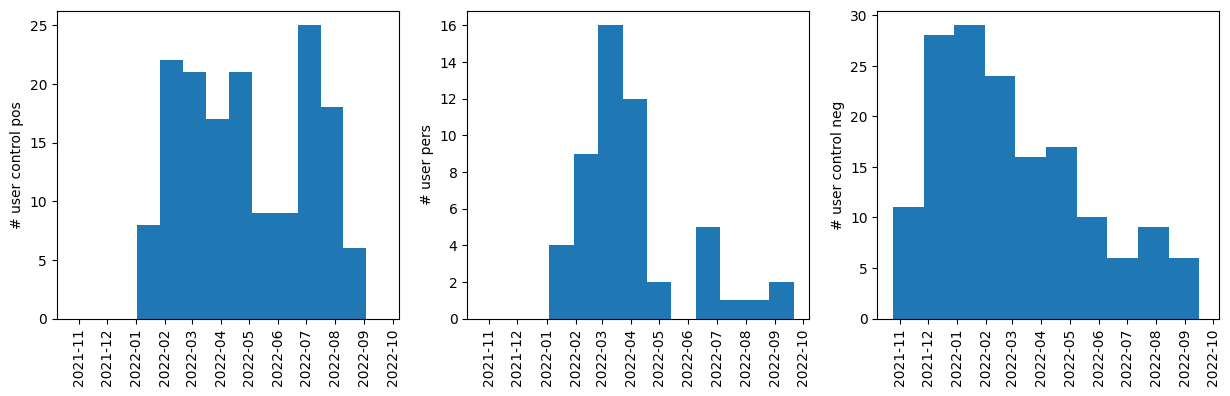

In [8]:
fig, ax = plt.subplots(1,3,figsize=(15,4),sharex=True)
ax[0].hist(testdatesc)
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylabel('# user control pos');
ax[1].hist(testdates)
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_ylabel('# user pers');
ax[2].hist(testdatesn)
ax[2].tick_params(axis='x', rotation=90)
ax[2].set_ylabel('# user control neg');

## sleep hr

In [9]:
seas = pd.read_csv('mean_rhr_pdps.csv',index_col=0)

In [10]:
def sliding_window(elements, window_size):
    wi_days = []
    for i in range(1,len(elements)+1):
        if i >= window_size:
            wi_days.append(elements[i-window_size:i])
        elif i < window_size:
            wi_days.append(elements[:i])
    return wi_days

In [11]:
def get_night(subd):
    subd = subd.copy()
    subd['start'] = pd.to_datetime(subd['start'])
    subd = subd[subd['start'].notna()]
    if len(subd.dropna()) > 0:
 
         
        night_inact = subd[(subd['start'].dt.time < pd.to_datetime('07:00:00').time())&((subd['steps'].isna())|(subd['steps']==0))]['hr'].dropna() 
        night = subd[(subd['start'].dt.time < pd.to_datetime('07:00:00').time())]['hr'].dropna() 
         
        if len(night) >= 20  :
            return  night.min(), night.std(), night_inact.min(), night_inact.std()
        else:
            return 0,0,0,0
    else:
        return 0,0,0,0
       

In [12]:
lcu_night_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
lcu_night_inact_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
lcu_night_std = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
lcu_night_inact_std = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
 
i =0
for ui in range(len(cdf)):# np.where(s_i & a_i)[0]:
    df = cdf[ui].copy()
    df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    
    sc = df.source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','rhr','hr','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    df_seas = pd.merge(df,seas_sc, how = 'outer', on ='date')
    #df_seas = df_seas.dropna()
    df_seas['rhr_cl'] = df_seas['rhr'] - df_seas['mean']
    df_seas['hr_cl'] = df_seas['hr'] - df_seas['mean']
    #df['day_totest'] = df['date'] - df['dt']
    
    
    wi_list = sliding_window(df['date'].unique(),7)
    #dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        nightm, nights, night_im, night_is = get_night(df_seas[df_seas['date'].isin(wi_list[wi])])
       
        lcu_night_mean.loc[df.day_totest.unique()[wi],i] =  nightm
        lcu_night_std.loc[df.day_totest.unique()[wi],i] =  nights
        lcu_night_inact_mean.loc[df.day_totest.unique()[wi],i] =  night_im
        lcu_night_inact_std.loc[df.day_totest.unique()[wi],i] =  night_is
     
            
         
    i += 1

In [13]:
mu_night_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
mu_night_inact_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
mu_night_std = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
mu_night_inact_std = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
 
i =0
for ui in matched_idx:# np.where(s_i & a_i)[0]:
    df = mcdf[ui].copy()
    df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    
    sc = df.source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','rhr','hr','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    df_seas = pd.merge(df,seas_sc, how = 'outer', on ='date')
    #df_seas = df_seas.dropna()
    df_seas['rhr_cl'] = df_seas['rhr'] - df_seas['mean']
    df_seas['hr_cl'] = df_seas['hr'] - df_seas['mean']
    #df['day_totest'] = df['date'] - df['dt']
    
    
    wi_list = sliding_window(df['date'].unique(),7)
    #dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        nightm, nights, night_im, night_is = get_night(df_seas[df_seas['date'].isin(wi_list[wi])])
       
        mu_night_mean.loc[df.day_totest.unique()[wi],i] =  nightm
        mu_night_std.loc[df.day_totest.unique()[wi],i] =  nights
        mu_night_inact_mean.loc[df.day_totest.unique()[wi],i] =  night_im
        mu_night_inact_std.loc[df.day_totest.unique()[wi],i] =  night_is
     
            
         
    i += 1

In [14]:
nu_night_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(nmatched_idx)))
nu_night_inact_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(nmatched_idx)))
nu_night_std = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(nmatched_idx)))
nu_night_inact_std = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(nmatched_idx)))
 
i =0
for ui in nmatched_idx:# np.where(s_i & a_i)[0]:
    df = ncdf[ui].copy()
    df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    
    sc = df.source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','rhr','hr','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    df_seas = pd.merge(df,seas_sc, how = 'outer', on ='date')
    #df_seas = df_seas.dropna()
    df_seas['rhr_cl'] = df_seas['rhr'] - df_seas['mean']
    df_seas['hr_cl'] = df_seas['hr'] - df_seas['mean']
    #df['day_totest'] = df['date'] - df['dt']
    
    
    wi_list = sliding_window(df['date'].unique(),7)
    #dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        nightm, nights, night_im, night_is = get_night(df_seas[df_seas['date'].isin(wi_list[wi])])
       
        nu_night_mean.loc[df.day_totest.unique()[wi],i] =  nightm
        nu_night_std.loc[df.day_totest.unique()[wi],i] =  nights
        nu_night_inact_mean.loc[df.day_totest.unique()[wi],i] =  night_im
        nu_night_inact_std.loc[df.day_totest.unique()[wi],i] =  night_is
     
            
         
    i += 1

In [15]:
lcu_night_mean = lcu_night_mean.replace(0,np.nan)
nu_night_mean = nu_night_mean.replace(0,np.nan)
mu_night_mean = mu_night_mean.replace(0,np.nan)
lcu_night_inact_mean = lcu_night_inact_mean.replace(0,np.nan)
nu_night_inact_mean = nu_night_inact_mean.replace(0,np.nan)
mu_night_inact_mean = mu_night_inact_mean.replace(0,np.nan)

lcu_night_std = lcu_night_std.replace(0,np.nan)
nu_night_std = nu_night_std.replace(0,np.nan)
mu_night_std = mu_night_std.replace(0,np.nan)
lcu_night_inact_std = lcu_night_inact_std.replace(0,np.nan)
nu_night_inact_std = nu_night_inact_std.replace(0,np.nan)
mu_night_inact_std = mu_night_inact_std.replace(0,np.nan)


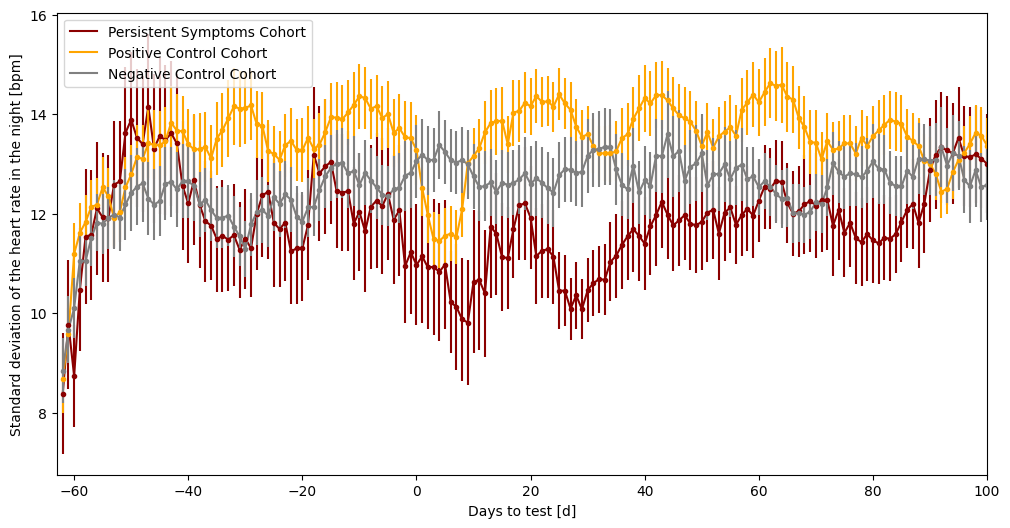

In [16]:
data_lc = lcu_night_std #- lcu_night_std[lcu_night_std.index < pd.Timedelta(days=-7)].mean()
data_pos = mu_night_std #- mu_night_std[mu_night_std.index < pd.Timedelta(days=-7)].mean()
data_neg = nu_night_std #- nu_night_std[nu_night_std.index < pd.Timedelta(days=-7)].mean()
plt.figure(figsize=(12,6))
plt.plot(data_lc.index.days,data_lc.mean(axis=1),c='darkred')
plt.plot(data_pos.index.days,data_pos.mean(axis=1),c='orange')
plt.plot(data_neg.index.days,data_neg.mean(axis=1),c='grey')
#plt.ylim(-5.5,7)
plt.xlim(-63,100)
#plt.errorbar(data.index.days,data.mean(axis=1),yerr = data.std(axis=1)/np.sqrt(data.notna().sum(axis=1).values), fmt=".")
plt.errorbar(data_lc.index.days,data_lc.mean(axis=1),yerr = data_lc.std(axis=1)/np.sqrt(data_lc.notna().sum(axis=1).values),c='darkred', fmt=".")#
plt.errorbar(data_pos.index.days,data_pos.mean(axis=1),yerr = data_pos.std(axis=1)/np.sqrt(data_pos.notna().sum(axis=1).values),c='orange', fmt=".")
plt.errorbar(data_neg.index.days,data_neg.mean(axis=1),yerr = data_neg.std(axis=1)/np.sqrt(data_neg.notna().sum(axis=1).values),c='grey', fmt=".")
plt.xlabel('Days to test [d]')
plt.ylabel('Standard deviation of the heart rate in the night [bpm]')
plt.legend(['Persistent Symptoms Cohort', 'Positive Control Cohort', 'Negative Control Cohort']);
plt.savefig('figures_pap/nightstd.png',dpi=300, bbox_inches="tight")

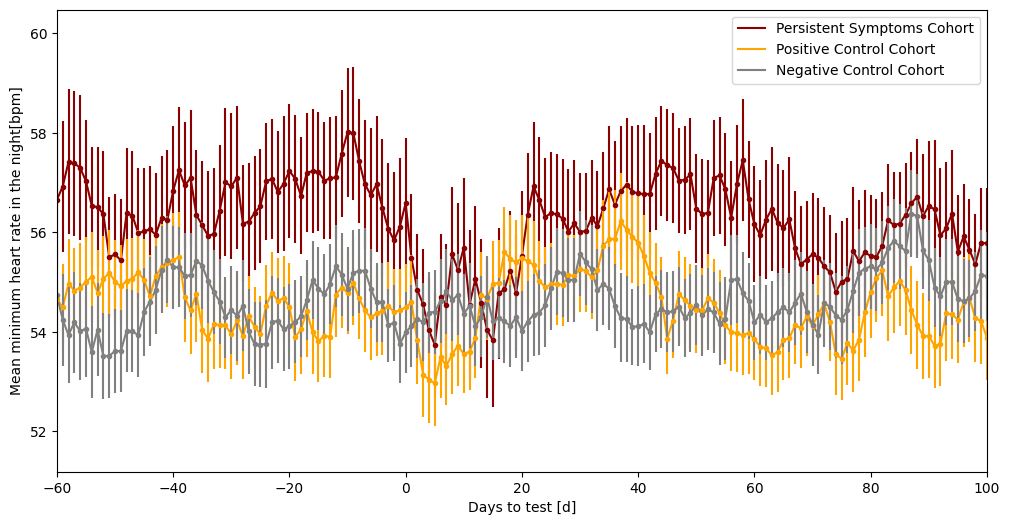

In [17]:
data_lc = lcu_night_mean #- lcu_night_mean[lcu_night_mean.index < pd.Timedelta(days=-7)].mean()
data_pos = mu_night_mean #- mu_night_mean[mu_night_mean.index < pd.Timedelta(days=-7)].mean()
data_neg = nu_night_mean #- nu_night_mean[nu_night_mean.index < pd.Timedelta(days=-7)].mean()
plt.figure(figsize=(12,6))
plt.plot(data_lc.index.days,data_lc.mean(axis=1),c='darkred')
plt.plot(data_pos.index.days,data_pos.mean(axis=1),c='orange')
plt.plot(data_neg.index.days,data_neg.mean(axis=1),c='grey')
#plt.ylim(-5.5,7)
plt.xlim(-60,100)
#plt.errorbar(data.index.days,data.mean(axis=1),yerr = data.std(axis=1)/np.sqrt(data.notna().sum(axis=1).values), fmt=".")
plt.errorbar(data_lc.index.days,data_lc.mean(axis=1),yerr = data_lc.std(axis=1)/np.sqrt(data_lc.notna().sum(axis=1).values),c='darkred', fmt=".")#
plt.errorbar(data_pos.index.days,data_pos.mean(axis=1),yerr = data_pos.std(axis=1)/np.sqrt(data_pos.notna().sum(axis=1).values),c='orange', fmt=".")
plt.errorbar(data_neg.index.days,data_neg.mean(axis=1),yerr = data_neg.std(axis=1)/np.sqrt(data_neg.notna().sum(axis=1).values),c='grey', fmt=".")
plt.xlabel('Days to test [d]')
plt.ylabel('Mean minimum heart rate in the night[bpm]')
plt.legend(['Persistent Symptoms Cohort', 'Positive Control Cohort', 'Negative Control Cohort']);
plt.savefig('figures_pap/nightminmean.png',dpi=300, bbox_inches="tight")

## rhr

In [18]:
seas = pd.read_csv('mean_rhr_pdps.csv',index_col=0)

In [19]:
def sliding_window(elements, window_size):
    wi_days = []
    for i in range(1,len(elements)+1):
        if i >= window_size:
            wi_days.append(elements[i-window_size:i])
        elif i < window_size:
            wi_days.append(elements[:i])
    return wi_days

In [52]:
def get_rhr(subd):
    subd = subd.copy()
    subd['start'] = pd.to_datetime(subd['start'])
    subd = subd[subd['start'].notna()]
    if len(subd.dropna()) > 0:
 
        rhr_rel = subd['rhr'].dropna()
        night = subd[(subd['start'].dt.time < pd.to_datetime('07:00:00').time())&((subd['steps'].isna())|(subd['steps']==0))]['hr'].dropna()
        day = subd[(subd['start'].dt.time >= pd.to_datetime('07:00:00').time())&((subd['steps'].notna())&(subd['steps']!=0))]['hr'].dropna()
        day_rest = subd[(subd['start'].dt.time >= pd.to_datetime('07:00:00').time())&((subd['steps'].isna())|(subd['steps']==0))]['hr'].dropna()
         
        if len(rhr_rel ) >= 20  :
            return  rhr_rel.mean(), day.mean(), night.mean(), day_rest.mean()
        else:
            return 0,0,0,0
    else:
        return 0,0,0,0
       

In [53]:
lcu_rhr_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
lcu_day_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
lcu_night_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
lcu_dayr_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf))) 
lcu_diff = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf))) 
i =0
for ui in range(len(cdf)):# np.where(s_i & a_i)[0]:
    df = cdf[ui].copy()
    df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    
    sc = df.source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','rhr','hr','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    df_seas = pd.merge(df,seas_sc, how = 'outer', on ='date')
    #df_seas = df_seas.dropna()
    df_seas['rhr_cl'] = df_seas['rhr'] - df_seas['mean']
    df_seas['hr_cl'] = df_seas['hr'] - df_seas['mean']
    #df['day_totest'] = df['date'] - df['dt']
    
    
    wi_list = sliding_window(df['date'].unique(),7)
    #dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        rhrm, daym, nightm, dayrm = get_rhr(df_seas[df_seas['date'].isin(wi_list[wi])])
        lcu_rhr_mean.loc[df.day_totest.unique()[wi],i] =  rhrm
        lcu_day_mean.loc[df.day_totest.unique()[wi],i] =  daym
        lcu_dayr_mean.loc[df.day_totest.unique()[wi],i] =  dayrm
        lcu_night_mean.loc[df.day_totest.unique()[wi],i] =  nightm
        if dayrm != 0 and nightm != 0:
            lcu_diff.loc[df.day_totest.unique()[wi],i] =  dayrm - nightm
            
         
    i += 1

In [54]:
mu_rhr_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
mu_day_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
mu_dayr_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
mu_night_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
mu_diff = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
 
i =0
for ui in matched_idx:# np.where(s_i & a_i)[0]:
    df = mcdf[ui].copy()
    df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    
    sc = df.source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','rhr','hr','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    df_seas = pd.merge(df,seas_sc, how = 'outer', on ='date')
    #df_seas = df_seas.dropna()
    df_seas['rhr_cl'] = df_seas['rhr'] - df_seas['mean']
    df_seas['hr_cl'] = df_seas['hr'] - df_seas['mean']
    #df['day_totest'] = df['date'] - df['dt']
    
    
    wi_list = sliding_window(df['date'].unique(),7)
    #dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        rhrm, daym, nightm, dayrm = get_rhr(df_seas[df_seas['date'].isin(wi_list[wi])])
        mu_rhr_mean.loc[df.day_totest.unique()[wi],i] =  rhrm
        mu_day_mean.loc[df.day_totest.unique()[wi],i] =  daym
        mu_dayr_mean.loc[df.day_totest.unique()[wi],i] =  dayrm
        mu_night_mean.loc[df.day_totest.unique()[wi],i] =  nightm
        if dayrm != 0 and nightm != 0:
            mu_diff.loc[df.day_totest.unique()[wi],i] =  dayrm - nightm
         
    i += 1
    

In [55]:
nu_rhr_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(nmatched_idx)))
nu_day_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(nmatched_idx)))
nu_dayr_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(nmatched_idx)))
nu_night_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(nmatched_idx)))
nu_diff = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(nmatched_idx)))
 
i =0
for ui in nmatched_idx:# np.where(s_i & a_i)[0]:
    df = ncdf[ui].copy()
    df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    
    sc = df.source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','rhr','hr','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    df_seas = pd.merge(df,seas_sc, how = 'outer', on ='date')
    #df_seas = df_seas.dropna()
    df_seas['rhr_cl'] = df_seas['rhr'] - df_seas['mean']
    df_seas['hr_cl'] = df_seas['hr'] - df_seas['mean']
    #df['day_totest'] = df['date'] - df['dt']
    
    
    wi_list = sliding_window(df['date'].unique(),7)
    #dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        rhrm, daym, nightm, dayrm = get_rhr(df_seas[df_seas['date'].isin(wi_list[wi])])
        nu_rhr_mean.loc[df.day_totest.unique()[wi],i] =  rhrm
        nu_day_mean.loc[df.day_totest.unique()[wi],i] =  daym
        nu_dayr_mean.loc[df.day_totest.unique()[wi],i] =  dayrm
        nu_night_mean.loc[df.day_totest.unique()[wi],i] =  nightm
        if dayrm != 0 and nightm != 0:
            nu_diff.loc[df.day_totest.unique()[wi],i] =  dayrm - nightm
         
    i += 1

In [56]:
lcu_rhr_mean = lcu_rhr_mean.replace(0,np.nan)
nu_rhr_mean = nu_rhr_mean.replace(0,np.nan)
mu_rhr_mean = mu_rhr_mean.replace(0,np.nan)

lcu_day_mean = lcu_day_mean.replace(0,np.nan)
nu_day_mean = nu_day_mean.replace(0,np.nan)
mu_day_mean = mu_day_mean.replace(0,np.nan)

lcu_dayr_mean = lcu_dayr_mean.replace(0,np.nan)
nu_dayr_mean = nu_dayr_mean.replace(0,np.nan)
mu_dayr_mean = mu_dayr_mean.replace(0,np.nan)

lcu_diff = lcu_diff.replace(0,np.nan)
nu_diff = nu_diff.replace(0,np.nan)
mu_diff = mu_diff.replace(0,np.nan)

lcu_night_mean = lcu_night_mean.replace(0,np.nan)
nu_night_mean = nu_night_mean.replace(0,np.nan)
mu_night_mean = mu_night_mean.replace(0,np.nan)

In [57]:
# plt.plot( mu_rhr_mean.index.days,mu_rhr_mean.notna().sum(axis=1
#                        ).values)
# plt.plot( nu_rhr_mean.index.days,nu_rhr_mean.notna().sum(axis=1
#                        ).values)
# plt.plot( lcu_rhr_mean.index.days,lcu_rhr_mean.notna().sum(axis=1
#                        ).values)

In [61]:
plt.rcParams['font.size'] = 22

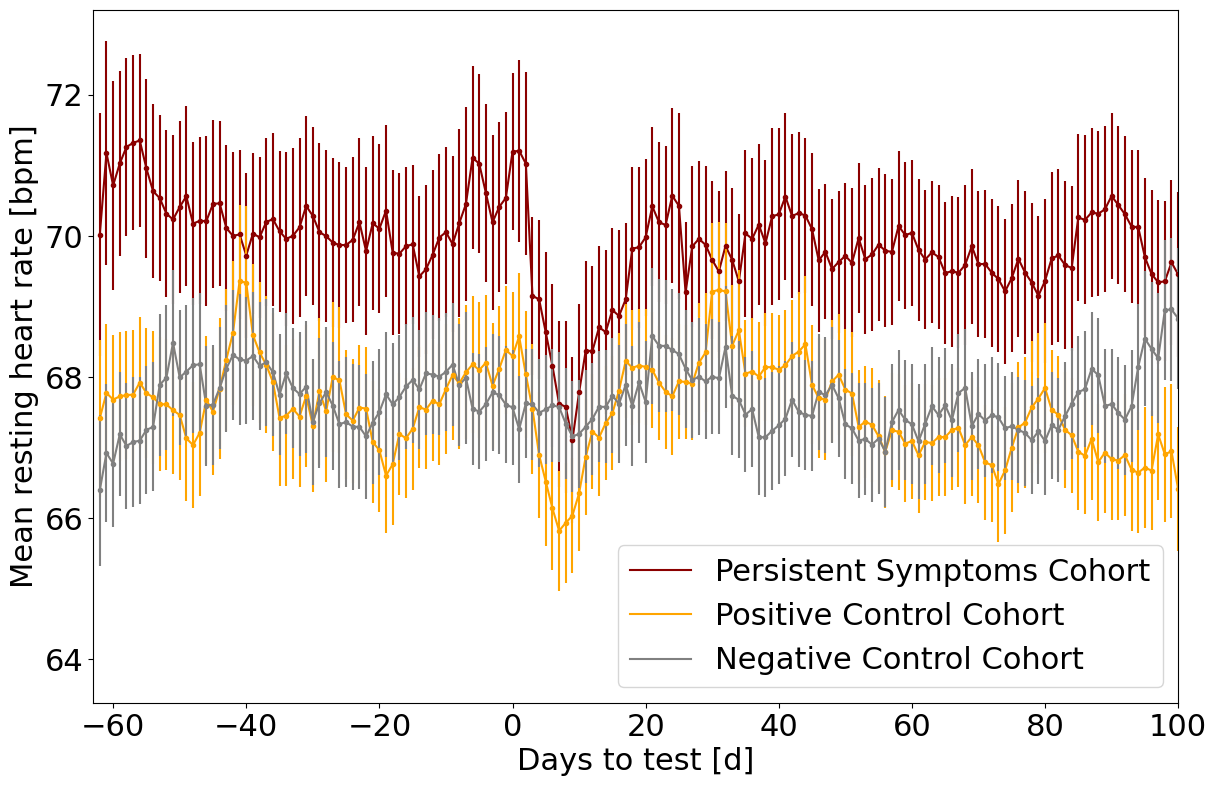

In [68]:
data_lc = lcu_rhr_mean #- lcu_rhr_mean[lcu_rhr_mean.index < pd.Timedelta(days=-7)].mean()
data_pos = mu_rhr_mean #- mu_rhr_mean[mu_rhr_mean.index < pd.Timedelta(days=-7)].mean()
data_neg = nu_rhr_mean #- nu_rhr_mean[nu_rhr_mean.index < pd.Timedelta(days=-7)].mean()
plt.figure(figsize=(14,9))
plt.plot(data_lc.index.days,data_lc.mean(axis=1),c='darkred')
plt.plot(data_pos.index.days,data_pos.mean(axis=1),c='orange')
plt.plot(data_neg.index.days,data_neg.mean(axis=1),c='grey')
#plt.ylim(-4,3)
plt.xlim(-63,100)
plt.errorbar(data_lc.index.days,data_lc.mean(axis=1),yerr = data_lc.std(axis=1)/np.sqrt(data_lc.notna().sum(axis=1).values),c='darkred', fmt=".")
plt.errorbar(data_pos.index.days,data_pos.mean(axis=1),yerr = data_pos.std(axis=1)/np.sqrt(data_pos.notna().sum(axis=1).values),c='orange', fmt=".")
plt.errorbar(data_neg.index.days,data_neg.mean(axis=1),yerr = data_neg.std(axis=1)/np.sqrt(data_neg.notna().sum(axis=1).values),c='grey', fmt=".")
plt.xlabel('Days to test [d]')
plt.ylabel('Mean resting heart rate [bpm]')
plt.legend(['Persistent Symptoms Cohort', 'Positive Control Cohort', 'Negative Control Cohort'],loc='lower right');
plt.savefig('figures_pap/rhr.png',dpi=300, bbox_inches="tight")

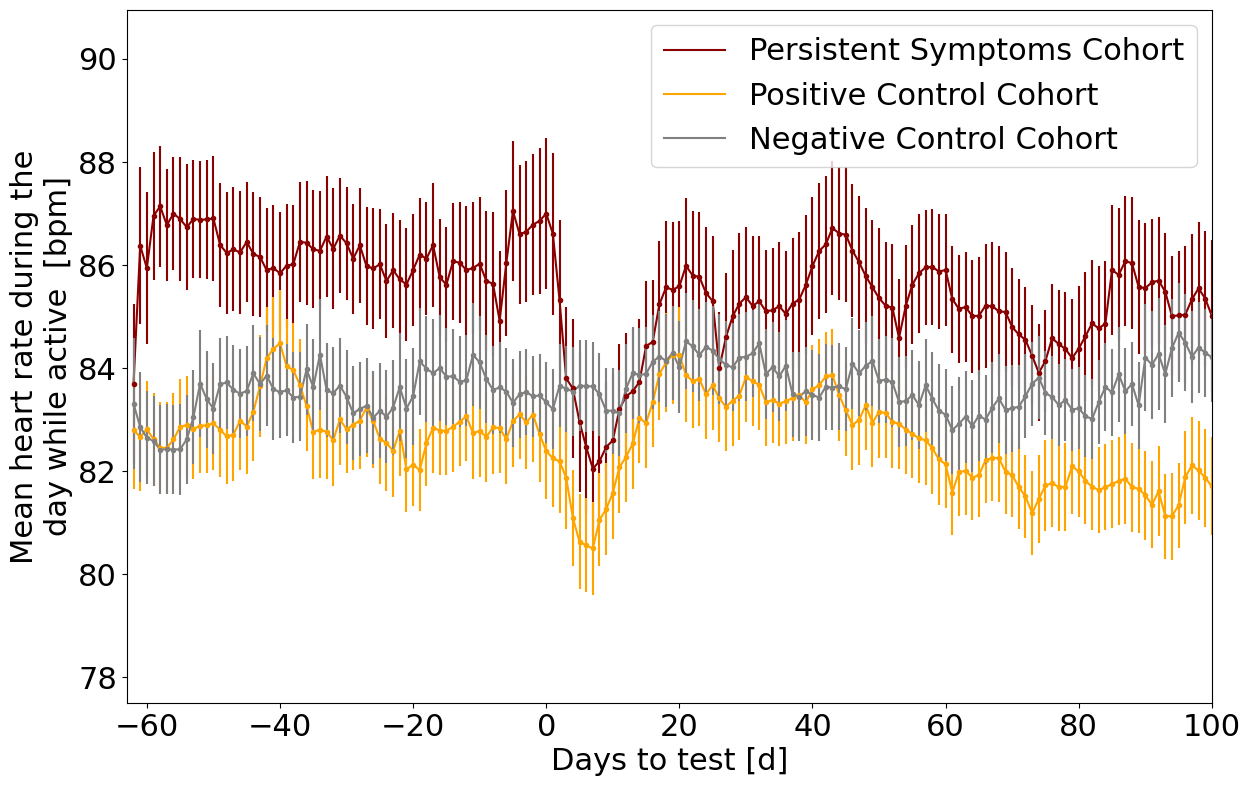

In [74]:
data_lc = lcu_day_mean #- lcu_day_mean[lcu_day_mean.index < pd.Timedelta(days=-7)].mean()
data_pos = mu_day_mean #- mu_day_mean[mu_day_mean.index < pd.Timedelta(days=-7)].mean()
data_neg = nu_day_mean #- nu_day_mean[nu_day_mean.index < pd.Timedelta(days=-7)].mean()
plt.figure(figsize=(14,9))
plt.plot(data_lc.index.days,data_lc.mean(axis=1),c='darkred')
plt.plot(data_pos.index.days,data_pos.mean(axis=1),c='orange')
plt.plot(data_neg.index.days,data_neg.mean(axis=1),c='grey')
#plt.ylim(-5,3)
plt.xlim(-63,100)
#plt.errorbar(data.index.days,data.mean(axis=1),yerr = data.std(axis=1)/np.sqrt(data.notna().sum(axis=1).values), fmt=".")
plt.errorbar(data_lc.index.days,data_lc.mean(axis=1),yerr = data_lc.std(axis=1)/np.sqrt(data_lc.notna().sum(axis=1).values),c='darkred', fmt=".")
plt.errorbar(data_pos.index.days,data_pos.mean(axis=1),yerr = data_pos.std(axis=1)/np.sqrt(data_pos.notna().sum(axis=1).values),c='orange', fmt=".")
plt.errorbar(data_neg.index.days,data_neg.mean(axis=1),yerr = data_neg.std(axis=1)/np.sqrt(data_neg.notna().sum(axis=1).values),c='grey', fmt=".")
plt.xlabel('Days to test [d]')
plt.ylabel(r'Mean heart rate during the'+'\n'+'day while active  [bpm]')
plt.legend(['Persistent Symptoms Cohort', 'Positive Control Cohort', 'Negative Control Cohort'],loc='upper right');
plt.savefig('figures_pap/hrdayactive.png',dpi=300, bbox_inches="tight")

In [29]:
def get_n(subd):
    subd = subd.copy()
    subd['start'] = pd.to_datetime(subd['start'])
    subd = subd[subd['start'].notna()]
    if len(subd.dropna()) > 0:
 
   
        day_rest = subd[(subd['start'].dt.time >= pd.to_datetime('07:00:00').time())&((subd['steps'].isna())|(subd['steps']==0))]['hr'].dropna()
         
         
        if len(day_rest) >= 20  :
            return  len(day_rest)/len(subd['hr'].dropna())
        else:
            return np.nan 
    else:
        return np.nan 

In [ ]:
mu_n = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx))) 
 
i =0
for ui in matched_idx:# np.where(s_i & a_i)[0]:
    df = mcdf[ui].copy()
    df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    
    sc = df.source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','rhr','hr','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    df_seas = pd.merge(df,seas_sc, how = 'outer', on ='date')
    #df_seas = df_seas.dropna()
    df_seas['rhr_cl'] = df_seas['rhr'] - df_seas['mean']
    df_seas['hr_cl'] = df_seas['hr'] - df_seas['mean']
    #df['day_totest'] = df['date'] - df['dt']
    
    
    wi_list = sliding_window(df['date'].unique(),7)
    #dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        epochn = get_n(df_seas[df_seas['date'].isin(wi_list[wi])])
        mu_n.loc[df.day_totest.unique()[wi],i] =  epochn
         
         
    i += 1

In [ ]:
nmu_n = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(nmatched_idx))) 
 
i =0
for ui in nmatched_idx:# np.where(s_i & a_i)[0]:
    df = ncdf[ui].copy()
    df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    
    sc = df.source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','rhr','hr','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    df_seas = pd.merge(df,seas_sc, how = 'outer', on ='date')
    #df_seas = df_seas.dropna()
    df_seas['rhr_cl'] = df_seas['rhr'] - df_seas['mean']
    df_seas['hr_cl'] = df_seas['hr'] - df_seas['mean']
    #df['day_totest'] = df['date'] - df['dt']
    
    
    wi_list = sliding_window(df['date'].unique(),7)
    #dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        epochn = get_n(df_seas[df_seas['date'].isin(wi_list[wi])])
        nmu_n.loc[df.day_totest.unique()[wi],i] =  epochn
         
         
    i += 1

In [ ]:
lcu_n = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf))) 
 
i =0
for ui in range(len(cdf)):# np.where(s_i & a_i)[0]:
    df = cdf[ui].copy()
    df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    
    sc = df.source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','rhr','hr','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    df_seas = pd.merge(df,seas_sc, how = 'outer', on ='date')
    #df_seas = df_seas.dropna()
    df_seas['rhr_cl'] = df_seas['rhr'] - df_seas['mean']
    df_seas['hr_cl'] = df_seas['hr'] - df_seas['mean']
    #df['day_totest'] = df['date'] - df['dt']
    
    
    wi_list = sliding_window(df['date'].unique(),7)
    #dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        epochn = get_n(df_seas[df_seas['date'].isin(wi_list[wi])])
        lcu_n.loc[df.day_totest.unique()[wi],i] =  epochn
         
         
    i += 1

In [ ]:
plt.plot(pd.to_timedelta(mu_n.index).days,mu_n.mean(axis=1))
plt.plot(pd.to_timedelta(lcu_n.index).days,lcu_n.mean(axis=1))
plt.plot(pd.to_timedelta(nmu_n.index).days,nmu_n.mean(axis=1))
plt.xlim(-60,100)
plt.ylabel('mean relative freq of inactive epochs')
plt.legend(['pos', 'pers', 'neg'])
plt.xlabel('days to test');

In [ ]:
plt.plot(lcu_night_mean.index.days,lcu_night_mean.notna().sum(axis=1),c='darkred')
plt.plot(lcu_night_mean.index.days,mu_night_mean.notna().sum(axis=1),c='orange')
plt.plot(lcu_night_mean.index.days,nu_night_mean.notna().sum(axis=1),c='grey')
plt.legend(['pers user', 'pos match', 'neg match']);
plt.ylabel('# user')
plt.xlim(-63,100)
plt.xlabel('days to test');

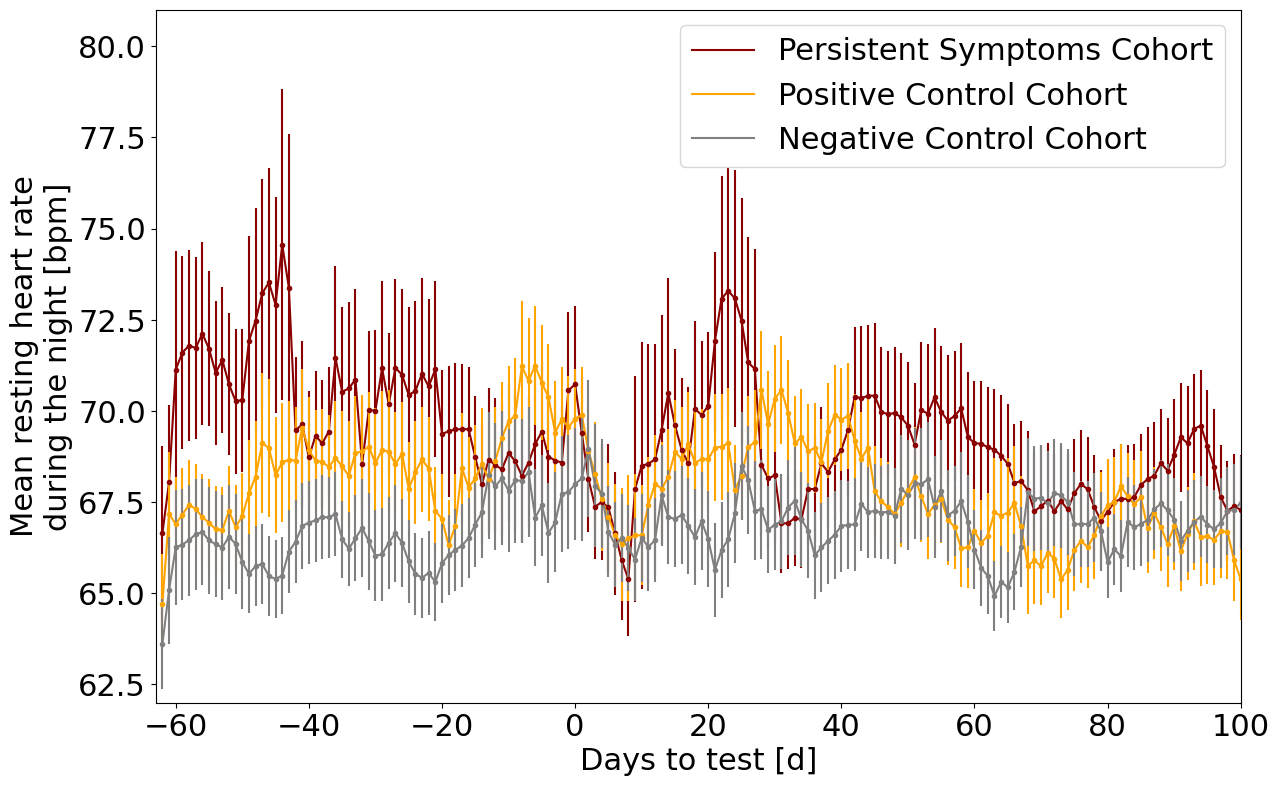

In [85]:
data_lc = lcu_night_mean #- lcu_night_mean[lcu_night_mean.index < pd.Timedelta(days=-7)].mean()
data_pos = mu_night_mean #- mu_night_mean[mu_night_mean.index < pd.Timedelta(days=-7)].mean()
data_neg = nu_night_mean #- nu_night_mean[nu_night_mean.index < pd.Timedelta(days=-7)].mean()
plt.figure(figsize=(14,9))
plt.plot(data_lc.index.days,data_lc.mean(axis=1),c='darkred')
plt.plot(data_pos.index.days,data_pos.mean(axis=1),c='orange')
plt.plot(data_neg.index.days,data_neg.mean(axis=1),c='grey')
plt.ylim(62,81)
plt.xlim(-63,100)
#plt.errorbar(data.index.days,data.mean(axis=1),yerr = data.std(axis=1)/np.sqrt(data.notna().sum(axis=1).values), fmt=".")
plt.errorbar(data_lc.index.days,data_lc.mean(axis=1),yerr = data_lc.std(axis=1)/np.sqrt(data_lc.notna().sum(axis=1).values),c='darkred', fmt=".")#
plt.errorbar(data_pos.index.days,data_pos.mean(axis=1),yerr = data_pos.std(axis=1)/np.sqrt(data_pos.notna().sum(axis=1).values),c='orange', fmt=".")
plt.errorbar(data_neg.index.days,data_neg.mean(axis=1),yerr = data_neg.std(axis=1)/np.sqrt(data_neg.notna().sum(axis=1).values),c='grey', fmt=".")
plt.xlabel('Days to test [d]')
plt.ylabel(r'Mean resting heart rate'+'\n'+'during the night [bpm]')
plt.legend(['Persistent Symptoms Cohort', 'Positive Control Cohort', 'Negative Control Cohort']);
plt.savefig('figures_pap/meannight.png',dpi=300, bbox_inches="tight")

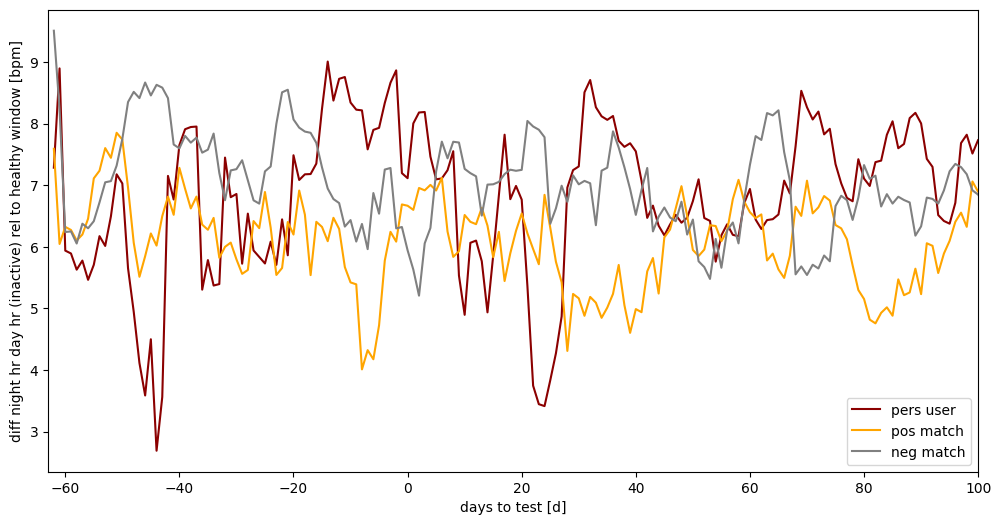

In [48]:
data_lc = lcu_diff #- lcu_diff[lcu_diff.index < pd.Timedelta(days=-7)].mean()
data_pos = mu_diff #- mu_diff[mu_diff.index < pd.Timedelta(days=-7)].mean()
data_neg = nu_diff #- nu_diff[nu_diff.index < pd.Timedelta(days=-7)].mean()
plt.figure(figsize=(12,6))
plt.plot(data_lc.index.days,data_lc.mean(axis=1),c='darkred')
plt.plot(data_pos.index.days,data_pos.mean(axis=1),c='orange')
plt.plot(data_neg.index.days,data_neg.mean(axis=1),c='grey')
p#lt.ylim(-7.5,4)
plt.xlim(-63,100)
#plt.errorbar(data.index.days,data.mean(axis=1),yerr = data.std(axis=1)/np.sqrt(data.notna().sum(axis=1).values), fmt=".")
#plt.errorbar(data_lc.index.days,data_lc.mean(axis=1),yerr = data_lc.std(axis=1)/np.sqrt(data_lc.notna().sum(axis=1).values),c='darkred', fmt=".")#
#plt.errorbar(data_pos.index.days,data_pos.mean(axis=1),yerr = data_pos.std(axis=1)/np.sqrt(data_pos.notna().sum(axis=1).values),c='orange', fmt=".")
#plt.errorbar(data_neg.index.days,data_neg.mean(axis=1),yerr = data_neg.std(axis=1)/np.sqrt(data_neg.notna().sum(axis=1).values),c='grey', fmt=".")
plt.xlabel('days to test [d]')
plt.ylabel('diff night hr day hr (inactive) rel to healthy window [bpm]')
plt.legend(['pers user', 'pos match', 'neg match'],loc='lower right');

## steps

In [ ]:
# consider people awake from 06 to 22h => 16 hours => 64 15 min time bins
# divide mean steps by 64 to have mean steps per time bin 
# OR
# calc steps pd and subtract daily mean p sc p day

In [86]:
seas = pd.read_csv('mean_steps_pdps.csv',index_col=0)

In [87]:
mean_st_pd = np.zeros((len(cdf),4))
for u in range(len(cdf)):
    df = cdf[u].copy()
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    sc = df.source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    #df_seas = pd.merge(df,seas_sc, how = 'outer', on ='date')
    #df_seas = df_seas.dropna()
    #df_seas['steps_cl'] = df_seas['steps'] - df_seas['mean']
    for ph in range(4):        
        df_seas = pd.merge(df[df['phase'] == ph].groupby('date').sum().reset_index(),seas_sc,how='inner',on='date')
        df_seas = df_seas[df_seas['steps'] != 0]
        steps_pd = df_seas['steps'] - df_seas['mean']
        mean_st_pd[u, ph] = steps_pd.mean()
        
n_mean_st_pd = np.zeros((len(nmatched_idx),4))
i=0
for u in nmatched_idx:
    df = ncdf[u].copy()
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    sc = df.source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    for ph in range(4):       
        df_seas = pd.merge(df[df['phase'] == ph].groupby('date').sum().reset_index(),seas_sc,how='inner',on='date')
        df_seas = df_seas[df_seas['steps'] != 0]
        steps_pd = df_seas['steps'] - df_seas['mean']
        n_mean_st_pd[i, ph] = steps_pd.mean()
    i += 1
mask = ~np.isnan(n_mean_st_pd)
n_mean_st_pd= [d[m] for d, m in zip(n_mean_st_pd.T, mask.T)]

i = 0 
p_mean_st_pd = np.zeros((len(matched_idx),4))
for u in matched_idx:   
    df = mcdf[u].copy()
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    sc = df.source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    for ph in range(4):       
        df_seas = pd.merge(df[df['phase'] == ph].groupby('date').sum().reset_index(),seas_sc,how='inner',on='date')
        df_seas = df_seas[df_seas['steps'] != 0]
        steps_pd = df_seas['steps'] - df_seas['mean']
        p_mean_st_pd[i, ph] = steps_pd.mean()
    i += 1
mask = ~np.isnan(p_mean_st_pd)
p_mean_st_pd= [d[m] for d, m in zip(p_mean_st_pd.T, mask.T)] 

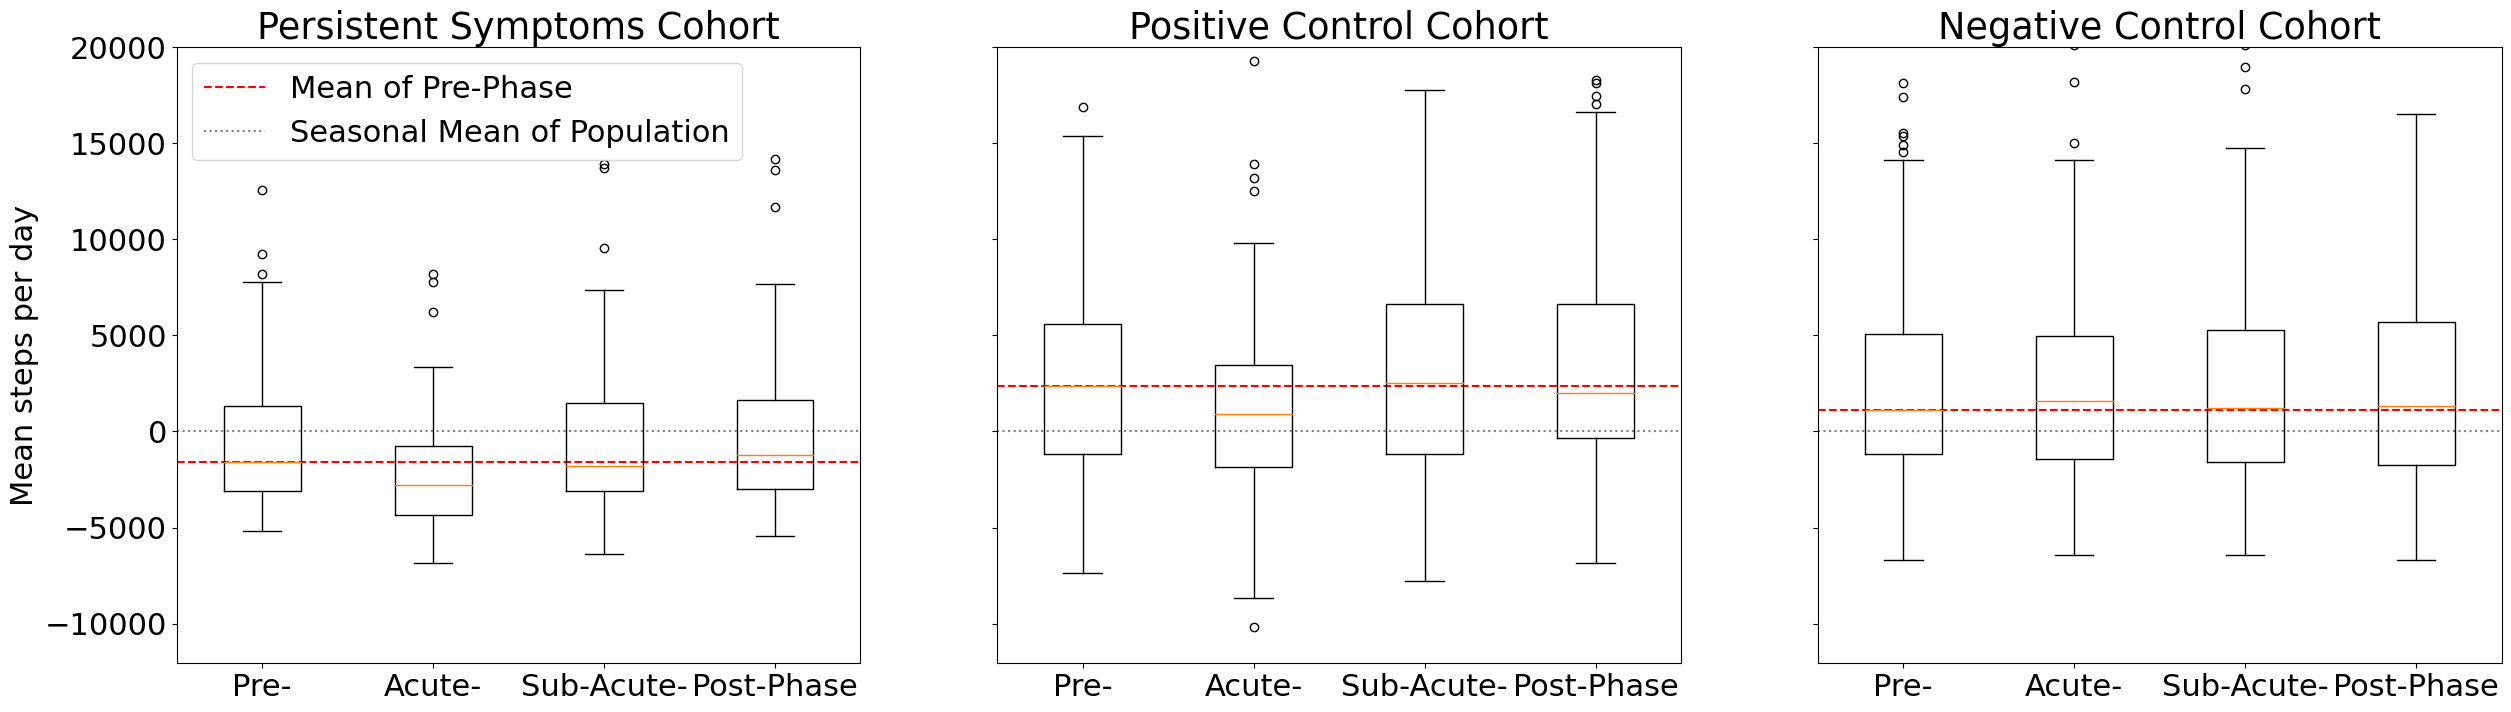

In [91]:
fig,ax = plt.subplots(1,3,figsize=(30,8),sharex=True,sharey=True)

ax[0].hlines(y=np.median(mean_st_pd[:,0]),xmin=0.5, xmax=4.5,color='r',linestyles='dashed')
ax[1].hlines(y=np.median(p_mean_st_pd[0]),xmin=0.5, xmax=4.5,color='r',linestyles='dashed')
ax[2].hlines(y=np.median(n_mean_st_pd[0]),xmin=0.5, xmax=4.5,color='r',linestyles='dashed')

ax[0].hlines(y=0,xmin=0.5, xmax=4.5,color='grey',linestyles='dotted')
ax[1].hlines(y=0,xmin=0.5, xmax=4.5,color='grey',linestyles='dotted')
ax[2].hlines(y=0,xmin=0.5, xmax=4.5,color='grey',linestyles='dotted')

ax[0].legend(['Mean of Pre-Phase', 'Seasonal Mean of Population'])
ax[0].boxplot(mean_st_pd);
ax[1].boxplot(p_mean_st_pd);
ax[2].boxplot(n_mean_st_pd);
ax[0].set_ylim(top=20000)

ax[0].set_ylabel('Mean steps per day')
ax[0].set_xticks(range(1,5), ['Pre-', 'Acute-', 'Sub-Acute-', 'Post-Phase']);
ax[1].set_title('Positive Control Cohort')
ax[2].set_title('Negative Control Cohort')
ax[0].set_title('Persistent Symptoms Cohort'); 
plt.savefig('figures_pap/meanstepspd.png',dpi=300, bbox_inches="tight")


## hr

In [ ]:
def get_md(subd):
    subd = subd.copy()
    subd['start'] = pd.to_datetime(subd['start'])
    subd = subd[subd['start'].notna()]
    if len(subd) > 0:
        night = subd[(subd['start'].dt.time < pd.to_datetime('07:00:00').time())&((subd['steps'].isna())|(subd['steps']==0))]['hr'].dropna()
        day = subd[(subd['start'].dt.time >= pd.to_datetime('07:00:00').time())&((subd['steps'].notna())&(subd['steps']!=0))]['hr'].dropna()
        #rhr_rel = subd[(subd['start'].dt.time < pd.to_datetime('07:00:00').time())&((subd['steps'].isna())|(subd['steps']==0))]['% of MHR'].dropna()
        rhr_rel = subd['rhr'].dropna()
        hr_rel = subd[(subd['start'].dt.time >= pd.to_datetime('07:00:00').time())&((subd['steps'].notna())&(subd['steps']!=0))]['% of MHR'].dropna()
        if len(day) >= 20 and len(night) < 5:
                return 0,0,day.mean(), day.std() #,0, hr_rel.mean()
        elif len(day) >= 20 and len(night) >= 5:
                return night.mean(), night.std(), day.mean(), day.std() #, rhr_rel.mean(), hr_rel.mean()
        else:
            return 0,0,0,0#,0,0
    else:
        return 0,0,0,0#,0,0

In [ ]:
lcu_day_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
lcu_night_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
lcu_diff = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
#lcu_rhr_rel = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(cdf)))
#lcu_hr_rel = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(cdf)))
i =0
for ui in range(len(cdf)):# np.where(s_i & a_i)[0]:
    df = cdf[ui].copy()
    df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    

    #df['day_totest'] = df['date'] - df['dt']
    wi_list = sliding_window(df['date'].unique(),7)
    dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        nm, ns, dm, ds = get_md(df[df['date'].isin(wi_list[wi])])
        lcu_day_mean.loc[lcu_day_mean.index.isin(dtt_list[wi]),i] =  dm
        lcu_night_mean.loc[lcu_night_mean.index.isin(dtt_list[wi]),i] =  nm
        #lcu_rhr_rel.loc[lcu_rhr_rel.index.isin(dtt_list[wi]),i] =  rhrr
        #lcu_hr_rel.loc[lcu_rhr_rel.index.isin(dtt_list[wi]),i] =  hrr
        if dm != 0 and nm != 0:
            lcu_diff.loc[lcu_night_mean.index.isin(dtt_list[wi]),i] = (dm - nm)/dm
    i += 1

In [ ]:
#lcu_diff = lcu_diff[(lcu_diff.index >= datetime.timedelta(days = -62)) &(lcu_diff.index <= datetime.timedelta(days = 180))]
#lcu_rhr_rel = lcu_rhr_rel[(lcu_rhr_rel.index >= datetime.timedelta(days = -62)) &(lcu_rhr_rel.index <= datetime.timedelta(days = 180))]
#lcu_day_mean = lcu_day_mean[(lcu_day_mean.index >= datetime.timedelta(days = -62)) &(lcu_day_mean.index <= datetime.timedelta(days = 180))]
#lcu_night_mean = lcu_night_mean[(lcu_night_mean.index >= datetime.timedelta(days = -62)) &(lcu_night_mean.index <= datetime.timedelta(days = 180))]
#lcu_hr_rel = lcu_hr_rel[(lcu_hr_rel.index >= datetime.timedelta(days = -62)) &(lcu_hr_rel.index <= datetime.timedelta(days = 180))]

In [ ]:
#lcu_rhr_rel = lcu_rhr_rel.replace(0, np.nan)
#lcu_hr_rel = lcu_hr_rel.replace(0, np.nan)
lcu_night_mean = lcu_night_mean.replace(0, np.nan)
lcu_day_mean = lcu_day_mean.replace(0, np.nan)
lcu_diff = lcu_diff.replace(0,np.nan)

## matched neg

In [ ]:
nu_day_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)),columns = range(len(nmatched_idx)))
nu_night_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(nmatched_idx)))
nu_diff = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(nmatched_idx)))
#mu_rhr_rel = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(mcdf)))
#mu_hr_rel = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(mcdf)))
i = 0
for ui in nmatched_idx:
    df = ncdf[ui].copy()
    df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    
    
    #df['day_totest'] = df['date'] - df['dt']
    wi_list = sliding_window(df['date'].unique(),7)
    dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        nm, ns, dm, ds,  = get_md(df[df['date'].isin(wi_list[wi])])
        nu_day_mean.loc[nu_day_mean.index.isin(dtt_list[wi]),i] =  dm
        nu_night_mean.loc[nu_night_mean.index.isin(dtt_list[wi]),i] =  nm
        #mu_rhr_rel.loc[mu_rhr_rel.index.isin(dtt_list[wi]),i] =  rhrr
        #mu_hr_rel.loc[mu_rhr_rel.index.isin(dtt_list[wi]),i] = hrr
        if dm != 0 and nm != 0:
            nu_diff.loc[nu_night_mean.index.isin(dtt_list[wi]),i] = (dm - nm)/dm
    i += 1
    
#nu_diff = nu_diff[(nu_diff.index >= datetime.timedelta(days = -62)) &(nu_diff.index <= datetime.timedelta(days = 180))] 
#nu_day_mean = nu_day_mean[(nu_day_mean.index >= datetime.timedelta(days = -62)) &(nu_day_mean.index <= datetime.timedelta(days = 180))]
#nu_night_mean = nu_night_mean[(nu_night_mean.index >= datetime.timedelta(days = -62)) &(nu_night_mean.index <= datetime.timedelta(days = 180))]

nu_night_mean = nu_night_mean.replace(0, np.nan)
nu_day_mean = nu_day_mean.replace(0, np.nan)
nu_diff = nu_diff.replace(0,np.nan)

## matched pos

In [ ]:
mu_day_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
mu_night_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
mu_diff = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
#mu_rhr_rel = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(mcdf)))
#mu_hr_rel = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(mcdf)))
i = 0
for ui in matched_idx:
    df = mcdf[ui].copy()
    df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    
    
    #df['day_totest'] = df['date'] - df['dt']
    wi_list = sliding_window(df['date'].unique(),7)
    dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        nm, ns, dm, ds,  = get_md(df[df['date'].isin(wi_list[wi])])
        mu_day_mean.loc[mu_day_mean.index.isin(dtt_list[wi]),i] =  dm
        mu_night_mean.loc[mu_night_mean.index.isin(dtt_list[wi]),i] =  nm
        #mu_rhr_rel.loc[mu_rhr_rel.index.isin(dtt_list[wi]),i] =  rhrr
        #mu_hr_rel.loc[mu_rhr_rel.index.isin(dtt_list[wi]),i] = hrr
        if dm != 0 and nm != 0:
            mu_diff.loc[mu_night_mean.index.isin(dtt_list[wi]),i] = (dm - nm)/dm
    i += 1
        

In [ ]:
#mu_diff = mu_diff[(mu_diff.index >= datetime.timedelta(days = -62)) &(mu_diff.index <= datetime.timedelta(days = 180))]
#mu_rhr_rel = mu_rhr_rel[(mu_rhr_rel.index >= datetime.timedelta(days = -62)) &(mu_rhr_rel.index <= datetime.timedelta(days = 180))]
#mu_hr_rel = mu_hr_rel[(mu_hr_rel.index >= datetime.timedelta(days = -62)) &(mu_hr_rel.index <= datetime.timedelta(days = 180))]
#mu_day_mean = mu_day_mean[(mu_day_mean.index >= datetime.timedelta(days = -62)) &(mu_day_mean.index <= datetime.timedelta(days = 180))]
#mu_night_mean = mu_night_mean[(mu_night_mean.index >= datetime.timedelta(days = -62)) &(mu_night_mean.index <= datetime.timedelta(days = 180))]

In [ ]:
mu_night_mean = mu_night_mean.replace(0, np.nan)
mu_day_mean = mu_day_mean.replace(0, np.nan)
mu_diff = mu_diff.replace(0,np.nan)

In [ ]:
plt.figure(figsize=(15,6))
mumeandiff = mu_diff - mu_diff[mu_diff.index < pd.Timedelta(days=-7)].mean(axis=0)
numeandiff = nu_diff - nu_diff[nu_night_mean.index < pd.Timedelta(days=-7)].mean(axis=0)
lcumeandiff = lcu_diff - lcu_diff[lcu_diff.index < pd.Timedelta(days=-7)].mean(axis=0)
plt.plot(lcumeandiff.index.days, lcumeandiff.mean(axis=1))
#plt.errorbar(lcumeanrhrrel.index.days,lcumeanrhrrel.mean(axis=1),yerr = lcumeanrhrrel.std(axis=1)/np.sqrt(lcumeanrhrrel.notna().sum(axis=1).values), fmt=".")
plt.plot(mumeandiff.index.days, mumeandiff.mean(axis=1))
#plt.errorbar(mumeanrhrrel.index.days,mumeanrhrrel.mean(axis=1),yerr = mumeanrhrrel.std(axis=1)/np.sqrt(mumeanrhrrel.notna().sum(axis=1).values), fmt=".")
plt.plot(numeandiff.index.days, numeandiff.mean(axis=1))
#plt.errorbar(numeanrhrrel.index.days,numeanrhrrel.mean(axis=1),yerr = numeanrhrrel.std(axis=1)/np.sqrt(numeanrhrrel.notna().sum(axis=1).values), fmt=".")

plt.legend(['pers user','pos match', 'neg match'])
plt.xlabel('days to test') 
plt.ylabel('mean diff rhr hr relative to mean in healthy window');

In [ ]:
plt.figure(figsize=(15,6))
mumeanrhrrel = mu_night_mean - mu_night_mean[mu_night_mean.index < pd.Timedelta(days=-7)].mean(axis=0)
numeanrhrrel = nu_night_mean - nu_night_mean[nu_night_mean.index < pd.Timedelta(days=-7)].mean(axis=0)
lcumeanrhrrel = lcu_night_mean - lcu_night_mean[lcu_night_mean.index < pd.Timedelta(days=-7)].mean(axis=0)
plt.plot(lcumeanrhrrel.index.days, lcumeanrhrrel.mean(axis=1))
#plt.errorbar(lcumeanrhrrel.index.days,lcumeanrhrrel.mean(axis=1),yerr = lcumeanrhrrel.std(axis=1)/np.sqrt(lcumeanrhrrel.notna().sum(axis=1).values), fmt=".")
plt.plot(mumeanrhrrel.index.days, mumeanrhrrel.mean(axis=1))
#plt.errorbar(mumeanrhrrel.index.days,mumeanrhrrel.mean(axis=1),yerr = mumeanrhrrel.std(axis=1)/np.sqrt(mumeanrhrrel.notna().sum(axis=1).values), fmt=".")
plt.plot(numeanrhrrel.index.days, numeanrhrrel.mean(axis=1))
#plt.errorbar(numeanrhrrel.index.days,numeanrhrrel.mean(axis=1),yerr = numeanrhrrel.std(axis=1)/np.sqrt(numeanrhrrel.notna().sum(axis=1).values), fmt=".")

plt.legend(['pers user','pos match', 'neg match'])
plt.xlabel('days to test') 
plt.ylabel('mean rhr relative to mean in healthy window');

In [ ]:
plt.figure(figsize=(15,6))
mumeanhrrel = mu_day_mean - mu_day_mean[mu_day_mean.index < pd.Timedelta(days=-7)].mean(axis=0)
numeanhrrel = nu_day_mean - nu_day_mean[nu_day_mean.index < pd.Timedelta(days=-7)].mean(axis=0)
lcumeanhrrel = lcu_day_mean - lcu_day_mean[lcu_day_mean.index < pd.Timedelta(days=-7)].mean(axis=0)
plt.plot(lcumeanhrrel.index.days, lcumeanhrrel.mean(axis=1))
#plt.errorbar(lcumeanrhrrel.index.days,lcumeanrhrrel.mean(axis=1),yerr = lcumeanrhrrel.std(axis=1)/np.sqrt(lcumeanrhrrel.notna().sum(axis=1).values), fmt=".")
plt.plot(mumeanhrrel.index.days, mumeanhrrel.mean(axis=1))
#plt.errorbar(mumeanrhrrel.index.days,mumeanrhrrel.mean(axis=1),yerr = mumeanrhrrel.std(axis=1)/np.sqrt(mumeanrhrrel.notna().sum(axis=1).values), fmt=".")
plt.plot(numeanhrrel.index.days, numeanhrrel.mean(axis=1))
#plt.errorbar(numeanrhrrel.index.days,numeanrhrrel.mean(axis=1),yerr = numeanrhrrel.std(axis=1)/np.sqrt(numeanrhrrel.notna().sum(axis=1).values), fmt=".")

plt.legend(['pers user','pos match', 'neg match'])
plt.xlabel('days to test') 
plt.ylabel('mean hr relative to mean in healthy window');

## High act

In [92]:
seas = pd.read_csv('mean_steps_pdps.csv',index_col=0)

In [93]:
mu_ha = pd.DataFrame(index = range(-8,26), columns = range(len(matched_idx)))
lcu_ha = pd.DataFrame(index = range(-8,26), columns = range(len(cdf)))
nu_ha = pd.DataFrame(index = range(-8,26), columns = range(len(nmatched_idx)))

In [94]:
for ui in range(len(cdf)):
    sc = cdf[ui].source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    #gb = cdf[ui].groupby(['week_totest','day_of_week']).sum()
    gb = pd.merge(cdf[ui].groupby(['week_totest','date']).sum().reset_index(), seas_sc, how='inner',on='date')
    #gb = gb[(gb.index >= (-8,0))&(gb.index < (26,0))]
    gb = gb[(gb.week_totest >= -8)&(gb.week_totest < 26)]
    #fil = gb['steps'] > 10000
    gb['fil'] = gb['steps'] > (gb['mean'] + ( gb['std']))
    lcu_ha.loc[gb.groupby('week_totest').sum().index,ui] = gb.groupby('week_totest').sum()['fil'].values
i=0    
for ui in nmatched_idx:
    sc = ncdf[ui].source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    #gb = ncdf[ui].groupby(['week_totest','day_of_week']).sum()
    gb = pd.merge(ncdf[ui].groupby(['week_totest','date']).sum().reset_index(), seas_sc, how='inner',on='date')
    #gb = gb[(gb.index >= (-8,0))&(gb.index < (26,0))]
    gb = gb[(gb.week_totest >= -8)&(gb.week_totest < 26)]
    #fil = gb['steps'] > 10000
    gb['fil'] = gb['steps'] > (gb['mean'] + ( gb['std']))
    nu_ha.loc[gb.groupby('week_totest').sum().index,i] = gb.groupby('week_totest').sum()['fil'].values
    i+=1
i = 0 
for ui in matched_idx:
    sc = mcdf[ui].source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    #gb = mcdf[ui].groupby(['week_totest','day_of_week']).sum()
    gb = pd.merge(mcdf[ui].groupby(['week_totest','date']).sum().reset_index(), seas_sc, how='inner',on='date')
    #gb = gb[(gb.index >= (-8,0))&(gb.index < (26,0))]
    gb = gb[(gb.week_totest >= -8)&(gb.week_totest < 26)]
    #fil = gb['steps'] > 10000
    gb['fil'] = gb['steps'] > (gb['mean'] + ( gb['std']))
    mu_ha.loc[gb.groupby('week_totest').sum().index,i] = gb.groupby('week_totest').sum()['fil'].values
    i += 1

Text(0.5, 0, 'weeks to test')

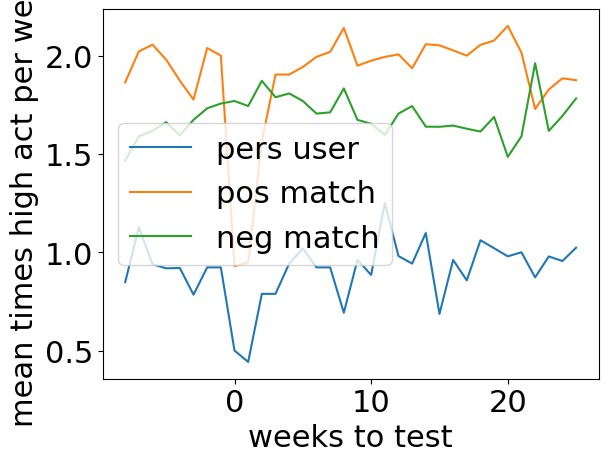

In [95]:
plt.plot(lcu_ha.mean(axis=1))
plt.plot(mu_ha.mean(axis=1))
plt.plot(nu_ha.mean(axis=1))
plt.legend(['pers user', 'pos match', 'neg match'])
plt.ylabel('mean times high act per week')
plt.xlabel('weeks to test')

In [96]:
import seaborn as sns

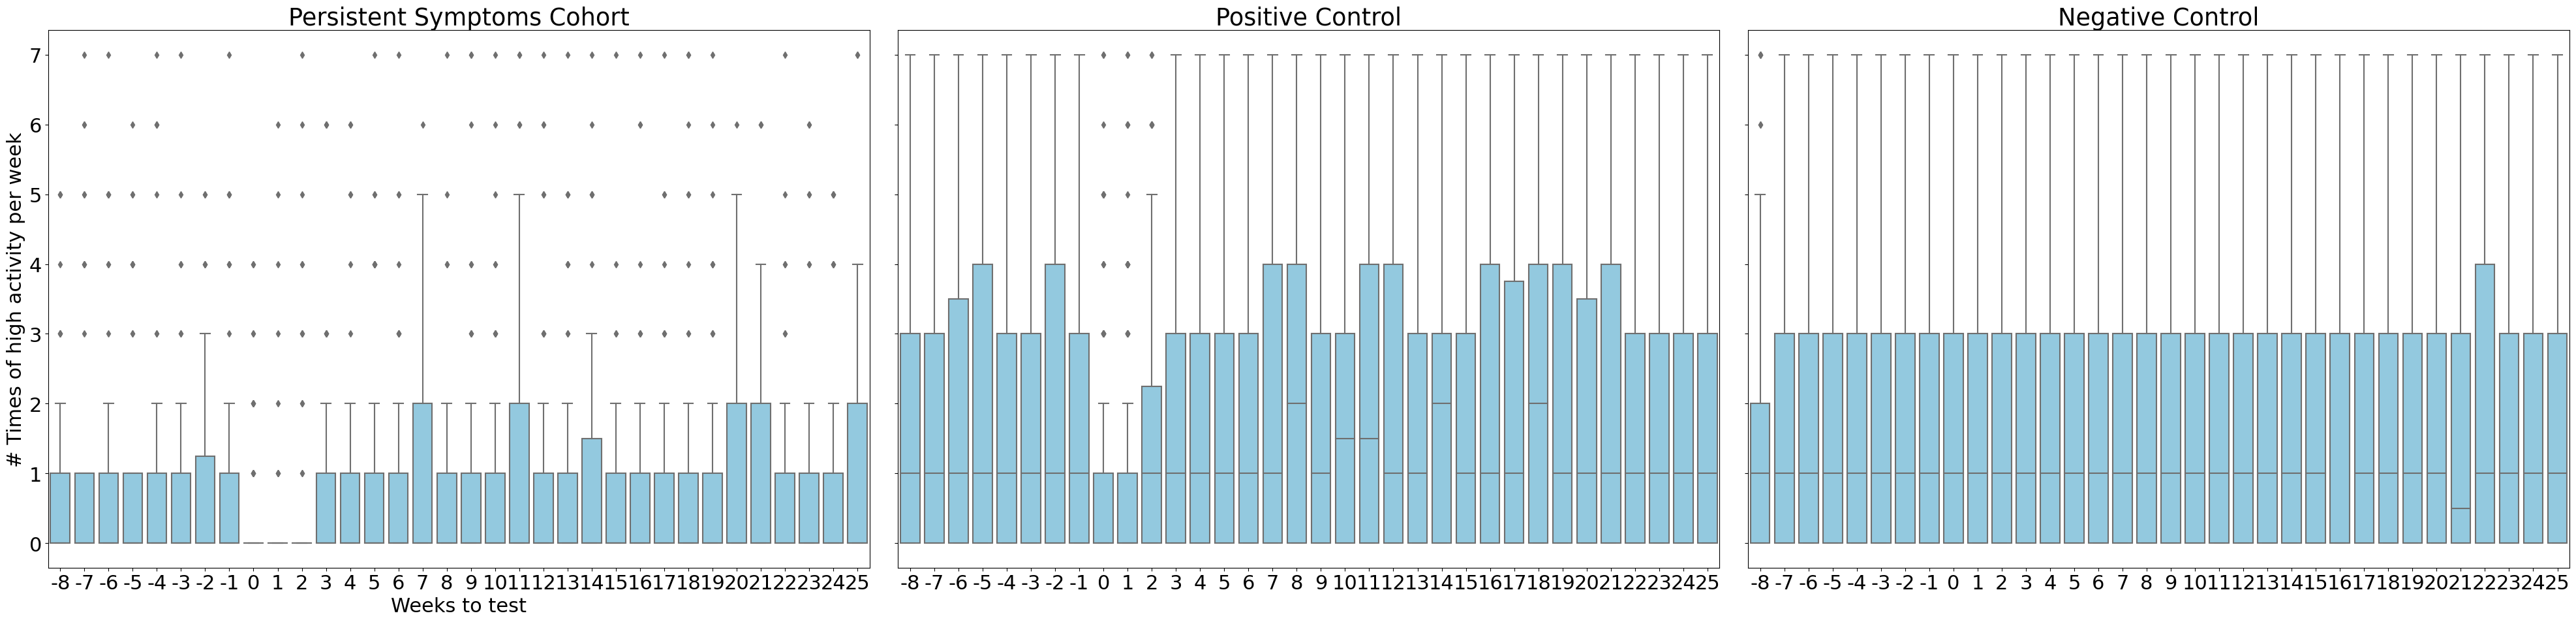

In [113]:
fig,ax = plt.subplots(1,3,figsize=(40,10),sharex=True,sharey=True)
sns.boxplot(lcu_ha.T,ax = ax[0], color='skyblue')
sns.boxplot(mu_ha.T,ax = ax[1], color='skyblue')
sns.boxplot(nu_ha.T,ax = ax[2], color='skyblue')
ax[0].set_ylabel('# Times of high activity per week')
ax[0].set_xlabel('Weeks to test')
ax[1].set_title('Positive Control')
ax[2].set_title('Negative Control')
ax[0].set_title('Persistent Symptoms Cohort'); 
plt.tight_layout()
plt.savefig('figures_pap/highactbox.png',dpi=300, bbox_inches="tight")

In [98]:
hah_lc = np.zeros((len(lcu_ha),8))
hah_n = np.zeros((len(lcu_ha),8))
hah_m = np.zeros((len(lcu_ha),8))
for nt in range(8):
    t = lcu_ha == nt
    hah_lc[:,nt] = t.sum(axis=1)/lcu_ha.notna().sum(axis=1)
    t = mu_ha == nt
    hah_m[:,nt] = t.sum(axis=1)/mu_ha.notna().sum(axis=1)
    t = nu_ha == nt
    hah_n[:,nt] = t.sum(axis=1)/nu_ha.notna().sum(axis=1)

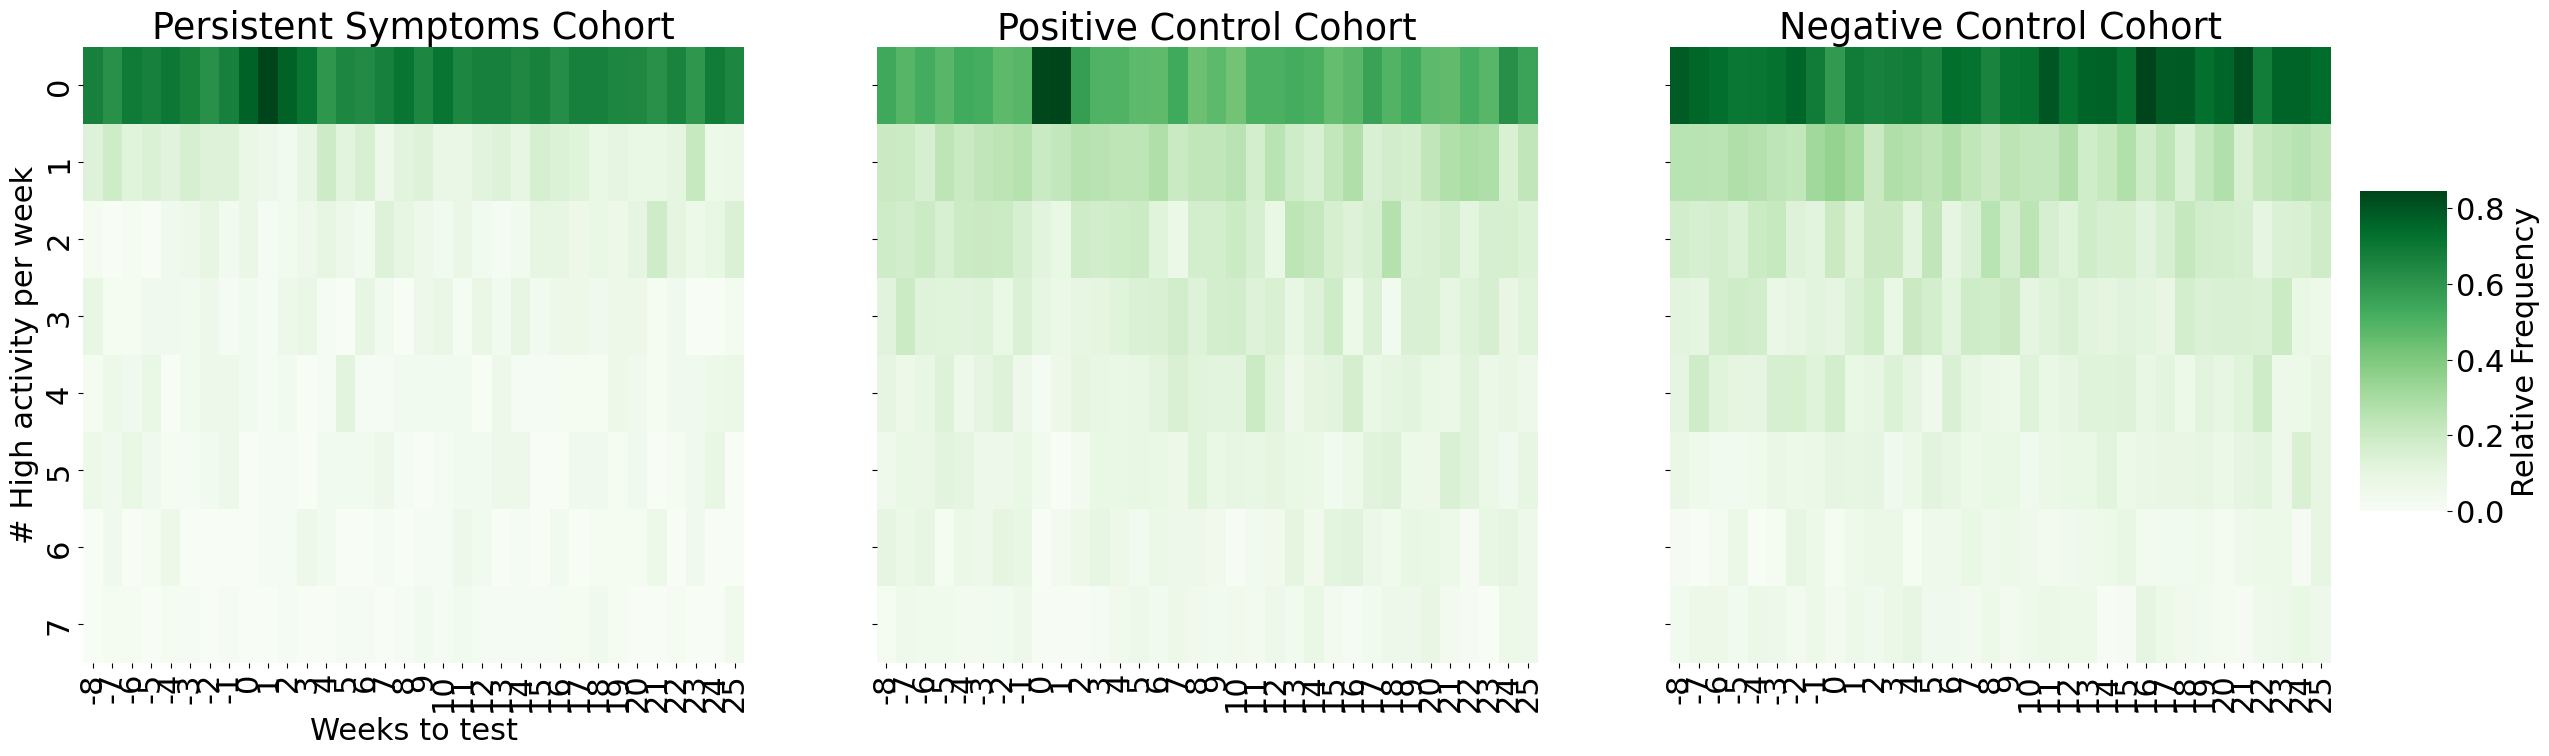

In [106]:
fig, axn = plt.subplots(1, 3,figsize=(29,8), sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
hmaps = [hah_lc.T, hah_m.T, hah_n.T]
title = ['Persistent Symptoms Cohort', 'Positive Control Cohort', 'Negative Control Cohort']
for i, ax in enumerate(axn.flat): 
    sns.heatmap(hmaps[i], ax=ax, cmap="Greens",
                cbar=i == 0,
                #vmin = 0, vmax = np.nanmax(xhd),
                #vmin=-1, vmax=np.nanmax(xhd-norm)/norm,
                cbar_ax=None if i else cbar_ax,cbar_kws={'label': 'Relative Frequency'},xticklabels=lcu_ha.index,yticklabels=range(0,8))
    
    axn[i].set_title(title[i])
    #axn[i].set_xticks(rotation=60) 
#fig.tight_layout(rect=[0, 0, .9, 1])
axn[0].set_ylabel('# High activity per week')
axn[0].set_xlabel('Weeks to test');
#plt.tight_layout()
plt.savefig('figures_pap/highactheatmap.png',dpi=300, bbox_inches="tight")

## mean steps per day

In [ ]:
mean_st_pd = np.zeros((len(cdf),4))
for u in range(len(cdf)):
    df = cdf[u].copy()
    for ph in range(4):        
        steps_pd = df[df['phase'] == ph].groupby('date').sum()['steps']
        mean_st_pd[u, ph] = steps_pd[steps_pd != 0].mean()
        
n_mean_st_pd = np.zeros((len(ncdf),4))
for u in range(len(ncdf)):
    df = ncdf[u].copy()
    for ph in range(4):       
        steps_pd = df[df['phase'] == ph].groupby('date').sum()['steps']
        n_mean_st_pd[u, ph] = steps_pd[steps_pd != 0].mean()
mask = ~np.isnan(n_mean_st_pd)
n_mean_st_pd= [d[m] for d, m in zip(n_mean_st_pd.T, mask.T)]
i = 0 
p_mean_st_pd = np.zeros((len(matched_idx),4))
for u in matched_idx:   
    df = mcdf[u].copy()
    for ph in range(4):       
        steps_pd = df[df['phase'] == ph].groupby('date').sum()['steps']
        p_mean_st_pd[i, ph] = steps_pd[steps_pd != 0].mean()
    i += 1
mask = ~np.isnan(p_mean_st_pd)
p_mean_st_pd= [d[m] for d, m in zip(p_mean_st_pd.T, mask.T)] 

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(25,5),sharex=True,sharey=True)
ax[0].boxplot(mean_st_pd);
ax[1].boxplot(p_mean_st_pd);
ax[2].boxplot(n_mean_st_pd);
ax[0].hlines(y=np.median(mean_st_pd[:,0]),xmin=0.5, xmax=4.5,color='r')
ax[1].hlines(y=np.median(p_mean_st_pd[0]),xmin=0.5, xmax=4.5,color='r')
ax[2].hlines(y=np.median(n_mean_st_pd[0]),xmin=0.5, xmax=4.5,color='r')
ax[0].set_ylabel('Mean steps per day')
ax[0].set_xlabel('phase');
#ax[1].set_title('pos match: '+str(len(matched_idx)))
#ax[2].set_title('neg match: '+str(len(ncdf)))
#ax[0].set_title('pers user: '+str(len(cdf)));
ax[1].set_title('Positive Control Cohort')
ax[2].set_title('Negative Control Cohort')
ax[0].set_title('Persistent Symptoms Cohort');

## HR STEPS

In [ ]:
m_agg = []
for ui in np.where(ms_i & ma_i)[0] :
    df = mcdf[ui]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by='date')
    # group by day and hourly - sum up steps and take mean of heart rate
    # per day 24 time bins with steps summed up and mean of heart rate

    #for du in range(len(df_lcu[0])): 
    d = df.copy()
    d['start'] = pd.to_datetime(d['start'])
    d['steps'] = d['steps'].fillna(0)
    d['steps'] = d['steps'] + 1

    df_aggv = pd.merge(d[['start','hr','rhr', '% of MHR', 'sleep']].set_index('start').resample('60min').mean().reset_index(),d[['start','steps']].set_index('start').resample('60min').sum().reset_index(),how='outer',on='start')
    d_agg = pd.merge(df_aggv, d[['start','date','day_of_week','weekend','dt','day_totest','week_totest', 'phase', 'source','id']].set_index('start').resample('60min').first().reset_index(),how='outer',on='start')
    m_agg.append(d_agg)

In [ ]:
l_agg = []
for ui in np.where(s_i & a_i)[0] :
    df = cdf[ui]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by='date')
    # group by day and hourly - sum up steps and take mean of heart rate
    # per day 24 time bins with steps summed up and mean of heart rate

    #for du in range(len(df_lcu[0])): 
    d = df.copy()
    d['start'] = pd.to_datetime(d['start'])
    d['steps'] = d['steps'].fillna(0)
    d['steps'] = d['steps'] + 1

    df_aggv = pd.merge(d[['start','hr','rhr', '% of MHR', 'sleep']].set_index('start').resample('60min').mean().reset_index(),d[['start','steps']].set_index('start').resample('60min').sum().reset_index(),how='outer',on='start')
    d_agg = pd.merge(df_aggv, d[['start','date','day_of_week','weekend','dt','day_totest','week_totest', 'phase', 'source','id']].set_index('start').resample('60min').first().reset_index(),how='outer',on='start')
    l_agg.append(d_agg)

In [ ]:
z_min_hr = []
z_max_hr = []
z_min_steps = []
z_max_steps = []
for df in m_agg:
    df['steps'] = df['steps'] - 4
    h_wind = df[(df['week_totest'] < -2) & (df['week_totest'] > -8)]
    if len(h_wind['week_totest'].unique()) >= 2 and len(h_wind[h_wind['hr'].notna()]) >= 10:
        hrm = h_wind['hr'].mean()
        hrstd = h_wind['hr'].std()
        stm = h_wind['steps'].mean()
        ststd = h_wind['steps'].std()
        df['hr_z'] = (df['hr'] - hrm )/ hrstd
        df['steps_z'] = (df['steps'] - stm )/ ststd
        z_min_hr.append(df['hr_z'].min())
        z_max_hr.append(df['hr_z'].max())
        z_min_steps.append(df['steps_z'].min())
        z_max_steps.append(df['steps_z'].max())
        
for df in l_agg:
    df['steps'] = df['steps'] - 4
    h_wind = df[(df['week_totest'] < -2) & (df['week_totest'] > -8)]
    if len(h_wind['week_totest'].unique()) >= 2 and len(h_wind[h_wind['hr'].notna()]) >= 10:
        hrm = h_wind['hr'].mean()
        hrstd = h_wind['hr'].std()
        stm = h_wind['steps'].mean()
        ststd = h_wind['steps'].std()
        df['hr_z'] = (df['hr'] - hrm )/ hrstd
        df['steps_z'] = (df['steps'] - stm )/ ststd
        z_min_hr.append(df['hr_z'].min())
        z_max_hr.append(df['hr_z'].max())
        z_min_steps.append(df['steps_z'].min())
        z_max_steps.append(df['steps_z'].max())

In [ ]:
minhr = min(z_min_hr)
maxhr = max(z_max_hr)
minsteps = min(z_min_steps)
maxsteps = max(z_max_steps)

In [ ]:
stepbin = np.linspace(minsteps-0.1, maxsteps+0.1, 20)
hrbin = np.linspace(minhr-0.1, maxhr+0.1, 20)

In [ ]:
#fig, ax = plt.subplots(2,4,figsize=(16,8),sharex = True, sharey=True)
histpps = []
for df in m_agg:
    df['steps'] = df['steps'] - 4
    h_wind =  df[(df['week_totest'] < -2) & (df['week_totest'] > -8)]
    if len(h_wind['week_totest'].unique()) >= 2 and len(h_wind[h_wind['hr'].notna()]) >= 10:
        hrm = h_wind['hr'].mean()
        hrstd = h_wind['hr'].std()
        stm = h_wind['steps'].mean()
        ststd = h_wind['steps'].std()
        df['hr_z'] = (df['hr'] - hrm )/ hrstd
        df['steps_z'] = (df['steps'] - stm )/ ststd
        histpp = np.zeros((19,19,4))
        for ph in [0,1,2,3]:      
            dph = df[df['phase'] == ph]
            dfhist = dph[['hr_z','steps_z']].dropna()
         
            n, b = np.histogram(dfhist['hr_z'],bins = hrbin)
            #ax[0,ph].stairs(n/len(dfhist['hr_z']), hrbin, fill=False)
            
            n, b = np.histogram(dfhist['steps_z'],bins = stepbin)
            #ax[1,ph].stairs(n/len(dfhist['steps_z']), stepbin, fill=False)
            
            H, xedges, yedges = np.histogram2d(dfhist['steps_z'], dfhist['hr_z'],bins=(stepbin, hrbin),normed=True)
            areas = np.matmul(np.array([np.diff(xedges)]).T, np.array([np.diff(yedges)]))
            histpp[:,:,ph] = H*areas
        histpps.append(histpp)

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(16,8),sharex = True, sharey=True)
for ph in [0,1,2,3]:
    hph = np.zeros((19,19, len(histpps)))
    for i in range(len(histpps)):
        hph[:,:,i] = histpps[i][:,:,ph]
    prob = np.nanmean(hph,axis =2)
    X, Y = np.meshgrid(xedges, yedges)
     
    im = ax[ph].pcolormesh(X, Y, np.log(prob.T ))
    ax[ph].set_xlabel('z transformed steps')
    ax[ph].set_ylabel('z transformed hr')
cbar = plt.colorbar(im);
cbar.ax.set_ylabel('log (probability)', rotation=270);

In [ ]:
#fig, ax = plt.subplots(2,4,figsize=(16,8),sharex = True, sharey=True)
histpps = []
for df in l_agg:
    df['steps'] = df['steps'] - 4
    h_wind =  df[(df['week_totest'] < -2) & (df['week_totest'] > -8)]
    if len(h_wind['week_totest'].unique()) >= 2 and len(h_wind[h_wind['hr'].notna()]) >= 10:
        hrm = h_wind['hr'].mean()
        hrstd = h_wind['hr'].std()
        stm = h_wind['steps'].mean()
        ststd = h_wind['steps'].std()
        df['hr_z'] = (df['hr'] - hrm )/ hrstd
        df['steps_z'] = (df['steps'] - stm )/ ststd
        histpp = np.zeros((19,19,4))
        for ph in [0,1,2,3]:      
            dph = df[df['phase'] == ph]
            dfhist = dph[['hr_z','steps_z']].dropna()
         
            n, b = np.histogram(dfhist['hr_z'],bins = hrbin)
            #ax[0,ph].stairs(n/len(dfhist['hr_z']), hrbin, fill=False)
            
            n, b = np.histogram(dfhist['steps_z'],bins = stepbin)
            #ax[1,ph].stairs(n/len(dfhist['steps_z']), stepbin, fill=False)
            
            H, xedges, yedges = np.histogram2d(dfhist['steps_z'], dfhist['hr_z'],bins=(stepbin, hrbin),normed=True)
            areas = np.matmul(np.array([np.diff(xedges)]).T, np.array([np.diff(yedges)]))
            histpp[:,:,ph] = H*areas
        histpps.append(histpp)

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(16,8),sharex = True, sharey=True)
for ph in [0,1,2,3]:
    hph = np.zeros((19,19, len(histpps)))
    for i in range(len(histpps)):
        hph[:,:,i] = histpps[i][:,:,ph]
    prob = np.nanmean(hph,axis =2)
    X, Y = np.meshgrid(xedges, yedges)
     
    im = ax[ph].pcolormesh(X, Y, np.log(prob.T ))
    ax[ph].set_xlabel('z transformed steps')
    ax[ph].set_ylabel('z transformed hr')
cbar = plt.colorbar(im);
cbar.ax.set_ylabel('log (probability)', rotation=270);